<a href="https://colab.research.google.com/github/TomasValadao/MachineLearning-PUC-Rio/blob/main/machine_learning_mvp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP: Machine Learning & Analytics
## Tomás Cavalcante Valadão

# 1. Definição do Problema

O dataset escolhido para a realização deste trabalho é composto por dados de alguns clientes de uma instituição financeira, que se encontram anonimizados. Dentro desse dataset, podemos encontrar algumas informações relacionadas à quantidade de produtos que um cliente possui, se ele tem crédito com a instituição e se ele deixou de ser cliente.

O objetivo deste trabalho é analisar o comportamento de uma base de clientes em relação aos produtos utilizados e verificar se existe alguma relação que possa determinar se uma quantidade menor de produtos tende a influenciar na permanência do cliente na instituição, considerando seu comportamento em relação à utilização dos produtos ofertados. Para analisar esse comportamento e criar uma regra capaz de prever se futuros clientes tendem a sair da instituição, esse problema foi modelado como um problema de classificação.

Os dados utilizados nesse relatório podem ser encontrados na plataforma [Kaggle](https://www.kaggle.com/datasets/shubhammeshram579/bank-customer-churn-prediction).

Neste trabalho, utilizamos um dataset chamado "Churn Modelling", que contém dados de alguns clientes da instituição, os produtos contratados e informações sobre se o indivíduo continua sendo cliente ou não.


Dataset Churn Modelling:
1. Row Number = Índice do registro
2. Customer ID = Identificador único do cliente
3. Surname = Sobrenome do cliente
4. Credit Score = Nota de crédito do cliente
5. Geography = País de origem do cliente (Espanha, França ou Alemanha)
6. Gender = Gênero do cliente
7. Age = Idade do cliente
8. Tenure = Tempo (em anos) que o cliente ficou na instituição
9. Balance = Balanço da conta corrente do cliente
10. Number of Products = Número de produtos contratados pelo cliente
11. Has Credit Card = O cliente tem cartão de crédito?
12. Is Active Member = Cliente ativo?
13. Estimated Salary = Salário estimado do cliente
14. Exited = O cliente saiu da instituição?

In [25]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# 2. Preparação de Dados

In [2]:
# Trazendo os dados dos títulos para o notebook

path_titles = "https://raw.githubusercontent.com/TomasValadao/MachineLearning-PUC-Rio/refs/heads/main/Churn_Modelling.csv"

df_churn = pd.read_csv(path_titles)
df_churn.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,NaN,1.0,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44.0,8,113755.78,2,1.0,0.0,149756.71,1
6,7,15592531,Bartlett,822,NaN,Male,50.0,7,0.00,2,1.0,1.0,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29.0,4,115046.74,4,1.0,0.0,119346.88,1
8,9,15792365,He,501,France,Male,44.0,4,142051.07,2,0.0,NaN,74940.50,0
9,10,15592389,H?,684,France,Male,NaN,2,134603.88,1,1.0,1.0,71725.73,0


In [3]:
# Visão geral do dataset utilizado
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10002 entries, 0 to 10001
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10002 non-null  int64  
 1   CustomerId       10002 non-null  int64  
 2   Surname          10002 non-null  object 
 3   CreditScore      10002 non-null  int64  
 4   Geography        10001 non-null  object 
 5   Gender           10002 non-null  object 
 6   Age              10001 non-null  float64
 7   Tenure           10002 non-null  int64  
 8   Balance          10002 non-null  float64
 9   NumOfProducts    10002 non-null  int64  
 10  HasCrCard        10001 non-null  float64
 11  IsActiveMember   10001 non-null  float64
 12  EstimatedSalary  10002 non-null  float64
 13  Exited           10002 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 1.1+ MB


In [4]:
# Agora vamos checar se temos alguma coluna com valores nulos
print(df_churn.isnull().any())

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography           True
Gender             False
Age                 True
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard           True
IsActiveMember      True
EstimatedSalary    False
Exited             False
dtype: bool


Como podemos ver, esse dataset se encontra com dados nulos que precisam ser tratados para evitar analises equivocadas. Para tratar esses dados, a opção escolhida foi por remover o registro do dataset, visto que não temos como inferir o dado que era pra ter sido inserido.

In [5]:
# Remove as colunas que foram identificadas com valores nulos
df_churned_cleaned = df_churn.dropna(subset=['Geography', 'Age', 'HasCrCard', 'IsActiveMember'])
print(df_churned_cleaned.isnull().any())
print(df_churned_cleaned.shape)

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool
(9998, 14)


Após garantir que o nosso dataset não contem nenhum registro nulo, nós precisamos garantir que não temos registros duplicados. Como o nosso identificador único é o campo CustomerId, nós vamos considerar que qualquer duplicata é um erro no dataset e que precisa ser removido.

In [6]:
# Número de registros únicos
print(df_churned_cleaned['CustomerId'].nunique())

# Identificação dos clientes duplicados
duplicated_values = df_churned_cleaned['CustomerId'][df_churned_cleaned['CustomerId'].duplicated()]
print("Duplicated CustomerIds:")
print(duplicated_values)

# Podemos ver que os identificadores 15682355 e 15628319 estão duplicados. Logo, nós vamos optar pelo primeiro registro encontrado e remover os registros duplicados.
df_churned_cleaned.tail(10)

9996
Duplicated CustomerIds:
9999     15682355
10001    15628319
Name: CustomerId, dtype: int64


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9992,9993,15657105,Chukwualuka,726,Spain,Male,36.0,2,0.00,1,1.0,0.0,195192.40,0
9993,9994,15569266,Rahman,644,France,Male,28.0,7,155060.41,1,1.0,0.0,29179.52,0
9994,9995,15719294,Wood,800,France,Female,29.0,2,0.00,2,0.0,0.0,167773.55,0
9995,9996,15606229,Obijiaku,771,France,Male,39.0,5,0.00,2,1.0,0.0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35.0,10,57369.61,1,1.0,1.0,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9999,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
10000,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0
10001,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


In [7]:
# Remoção dos registros duplicados
df_cleaned_no_duplicates = df_churned_cleaned.drop_duplicates(subset='CustomerId', keep='first')

# Garantindo que os dados se encontram consistentes
print(df_cleaned_no_duplicates.shape)
print(df_cleaned_no_duplicates['CustomerId'].nunique())

df_cleaned_no_duplicates.reset_index(drop=True, inplace=True)
df_cleaned_no_duplicates.tail(10)

(9996, 14)
9996


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9986,9991,15798964,Nkemakonam,714,Germany,Male,33.0,3,35016.60,1,1.0,0.0,53667.08,0
9987,9992,15769959,Ajuluchukwu,597,France,Female,53.0,4,88381.21,1,1.0,0.0,69384.71,1
9988,9993,15657105,Chukwualuka,726,Spain,Male,36.0,2,0.00,1,1.0,0.0,195192.40,0
9989,9994,15569266,Rahman,644,France,Male,28.0,7,155060.41,1,1.0,0.0,29179.52,0
9990,9995,15719294,Wood,800,France,Female,29.0,2,0.00,2,0.0,0.0,167773.55,0
9991,9996,15606229,Obijiaku,771,France,Male,39.0,5,0.00,2,1.0,0.0,96270.64,0
9992,9997,15569892,Johnstone,516,France,Male,35.0,10,57369.61,1,1.0,1.0,101699.77,0
9993,9998,15584532,Liu,709,France,Female,36.0,7,0.00,1,0.0,1.0,42085.58,1
9994,9999,15682355,Sabbatini,772,Germany,Male,42.0,3,75075.31,2,1.0,0.0,92888.52,1
9995,10000,15628319,Walker,792,France,Female,28.0,4,130142.79,1,1.0,0.0,38190.78,0


Após a validação inicial dos dados, podemos iniciar a análise para identificar quais atributos são relevantes para o nosso problema de classificação e quais podem ser descartados no processo de seleção de características. Como o número de atributos é relativamente baixo, não enfrentamos o problema da "maldição da dimensionalidade", o que nos permite dispensar o uso de métodos como o PCA para reduzir os atributos que impactam o modelo.

Considerando as colunas RowNumber (Contador de registro inicial), CustomerId (Identificador único do cliente) e o Surname (Sobrenome do cliente) nós vamos remover esses atributos dado o nosso conhecimento sobre o problema para que não haja nenhum tipo de ruído em relação ao cliente específico ou sobrenome.

In [8]:
df_final = df_cleaned_no_duplicates.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
print(df_final.head(5))

   CreditScore Geography  Gender   Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female  42.0       2       0.00              1   
1          608     Spain  Female  41.0       1   83807.86              1   
2          502    France  Female  42.0       8  159660.80              3   
3          699    France  Female  39.0       1       0.00              2   
4          645     Spain    Male  44.0       8  113755.78              2   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0        1.0             1.0        101348.88       1  
1        0.0             1.0        112542.58       0  
2        1.0             0.0        113931.57       1  
3        0.0             0.0         93826.63       0  
4        1.0             0.0        149756.71       1  


In [16]:
# Criando um codificador
le = LabelEncoder()

# Codificando a coluna 'Geography' (converte os valores de string em números)
df_final['Geography'] = le.fit_transform(df_final['Geography'])

# Repita o processo para outras colunas categóricas, como 'Gender', se necessário
df_final['Gender'] = le.fit_transform(df_final['Gender'])

In [32]:
# Preparação dos dados

# Separação em bases de treino e teste (holdout)
array = df_final.values
X = array[:,0:10] # atributos
y = array[:,10] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

#3. Modelagem e treinamento

In [33]:
# Definindo uma seed global para esta célula de código
np.random.seed(1)

LR-orig: 0.805 (0.010)
KNN-orig: 0.760 (0.013)
CART-orig: 0.787 (0.008)
NB-orig: 0.782 (0.015)
SVM-orig: 0.794 (0.011)
Bag-orig: 0.850 (0.011)
RF-orig: 0.858 (0.012)
ET-orig: 0.851 (0.009)
Ada-orig: 0.851 (0.014)
GB-orig: 0.860 (0.009)
Vot-orig: 0.812 (0.009)
LR-padr: 0.806 (0.013)
KNN-padr: 0.827 (0.016)
CART-padr: 0.787 (0.009)
NB-padr: 0.827 (0.012)
SVM-padr: 0.854 (0.012)
Bag-padr: 0.849 (0.012)
RF-padr: 0.857 (0.011)
ET-padr: 0.850 (0.013)
Ada-padr: 0.851 (0.014)
GB-padr: 0.860 (0.009)
Vot-padr: 0.848 (0.011)
LR-norm: 0.807 (0.013)
KNN-norm: 0.815 (0.016)
CART-norm: 0.784 (0.009)
NB-norm: 0.827 (0.012)
SVM-norm: 0.846 (0.010)
Bag-norm: 0.852 (0.012)
RF-norm: 0.858 (0.011)
ET-norm: 0.852 (0.013)
Ada-norm: 0.851 (0.014)
GB-norm: 0.860 (0.009)
Vot-norm: 0.843 (0.010)


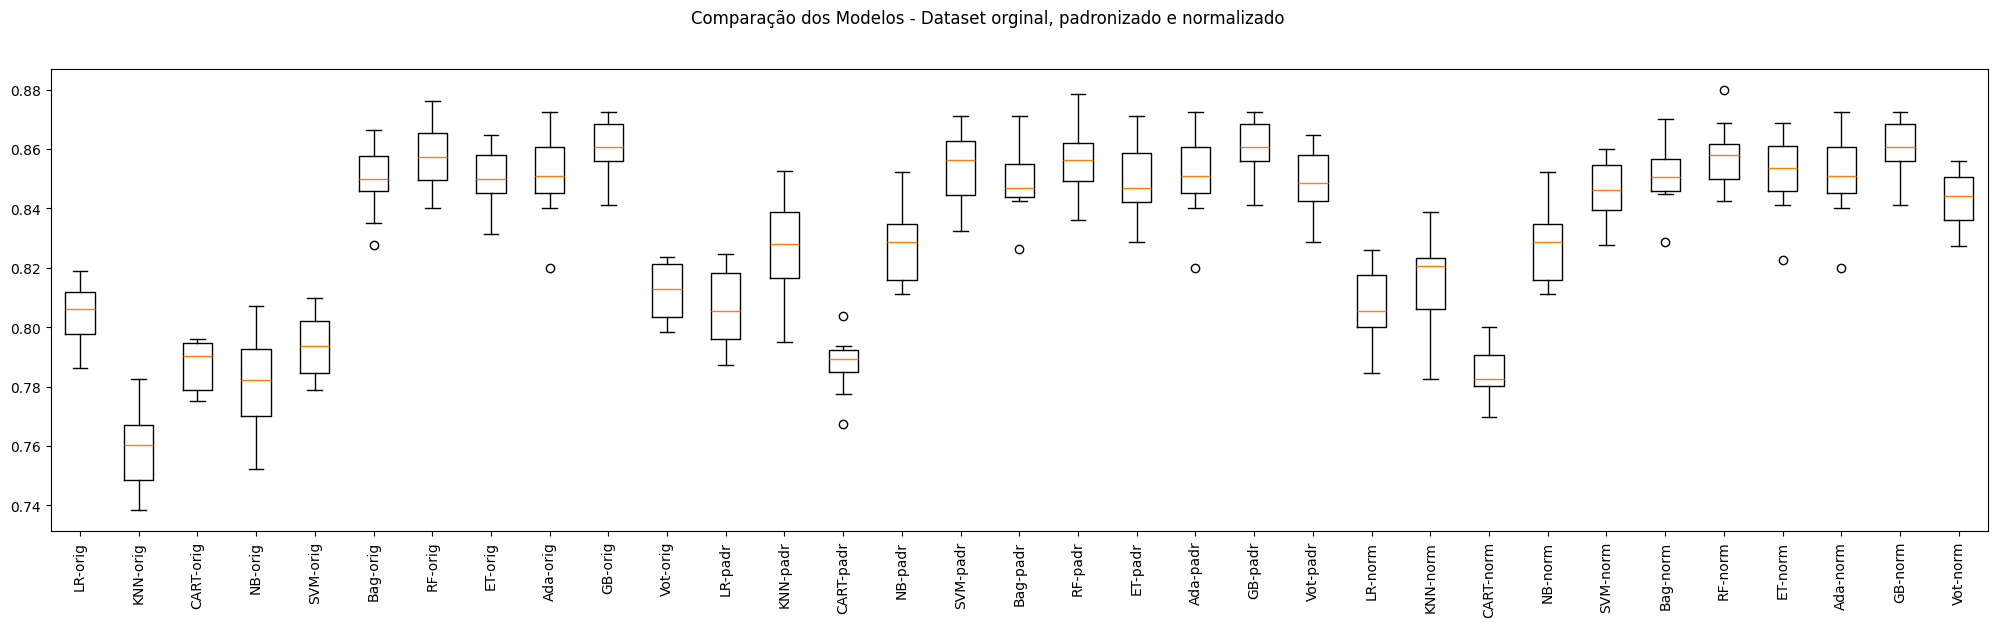

In [36]:
# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []

# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset orginal, padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

In [37]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model =  GradientBoostingClassifier(n_estimators=num_trees)
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

0.8725


#4. Avaliação de Resultados